In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"RT_IOT2022")
df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [4]:
df.columns

Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.

In [5]:
#df.sample(20)
#df.head(20)

In [6]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Unnamed: 0
[    0     1     2 ... 94656 94657 94658]

Column: id.orig_p
[38667 51143 44761 ... 64611 28723 28708]

Column: id.resp_p
[ 1883    80    53 ... 45685 49179 58631]

Column: proto
['tcp' 'udp' 'icmp']

Column: service
['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']

Column: flow_duration
[3.2011598e+01 3.1883584e+01 3.2124053e+01 ... 3.6275000e-02 8.4000000e-05
 5.1000000e-05]

Column: fwd_pkts_tot
[   9    8   11   10    1    7    6    2 1661  216    3    5   13   92
   40   19   18   32    4    0   16   72   17   14   12   15   25   35
   38   22   74   81   23   21   90   20   64   26   24   88   31   42
   28  130   29   69   33   39   47  440 1887   57   27  153   63  100
  112 1344   65  398   34   44   85   30  671 3549 1136  274  164  704
 4345   53   96   51  556   86  103   43   70  608   50  365  120   56
   67  118   48  157  232   78  237   36  860   79   77  533   76   66
 2166   37   52   45   87   95  177   97   61  106  172  110  10

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df_reduced = df.drop(columns=[
    'Unnamed: 0','fwd_subflow_pkts','bwd_subflow_pkts','fwd_subflow_bytes','bwd_subflow_bytes', 'fwd_header_size_tot','bwd_header_size_tot',
    'fwd_pkts_payload.tot','bwd_pkts_payload.tot', 'flow_pkts_payload.tot','fwd_iat.tot','bwd_iat.tot','flow_iat.tot','fwd_bulk_bytes',
    'bwd_bulk_bytes','fwd_bulk_packets','bwd_bulk_packets','fwd_bulk_rate','bwd_bulk_rate',
    'active.tot','idle.tot','fwd_URG_flag_count','bwd_URG_flag_count','flow_CWR_flag_count','flow_ECE_flag_count'
])

print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_reduced.shape}")
print(f"Columns removed: {df.shape[1] - df_reduced.shape[1]}")

Original shape: (123117, 85)
Reduced shape: (123117, 60)
Columns removed: 25


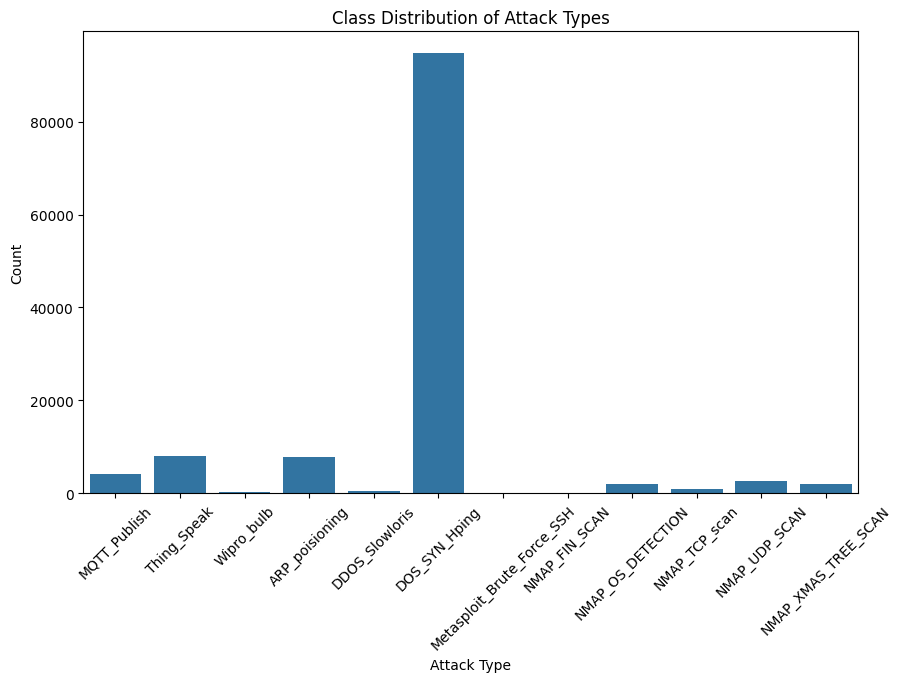

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attack_type', data=df_reduced)
plt.title("Class Distribution of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
for col in ['proto', 'service', 'Attack_type']:
    if df_reduced[col].dtype == 'object':
        df_reduced[col] = LabelEncoder().fit_transform(df_reduced[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_reduced.drop(columns=['Attack_type']))


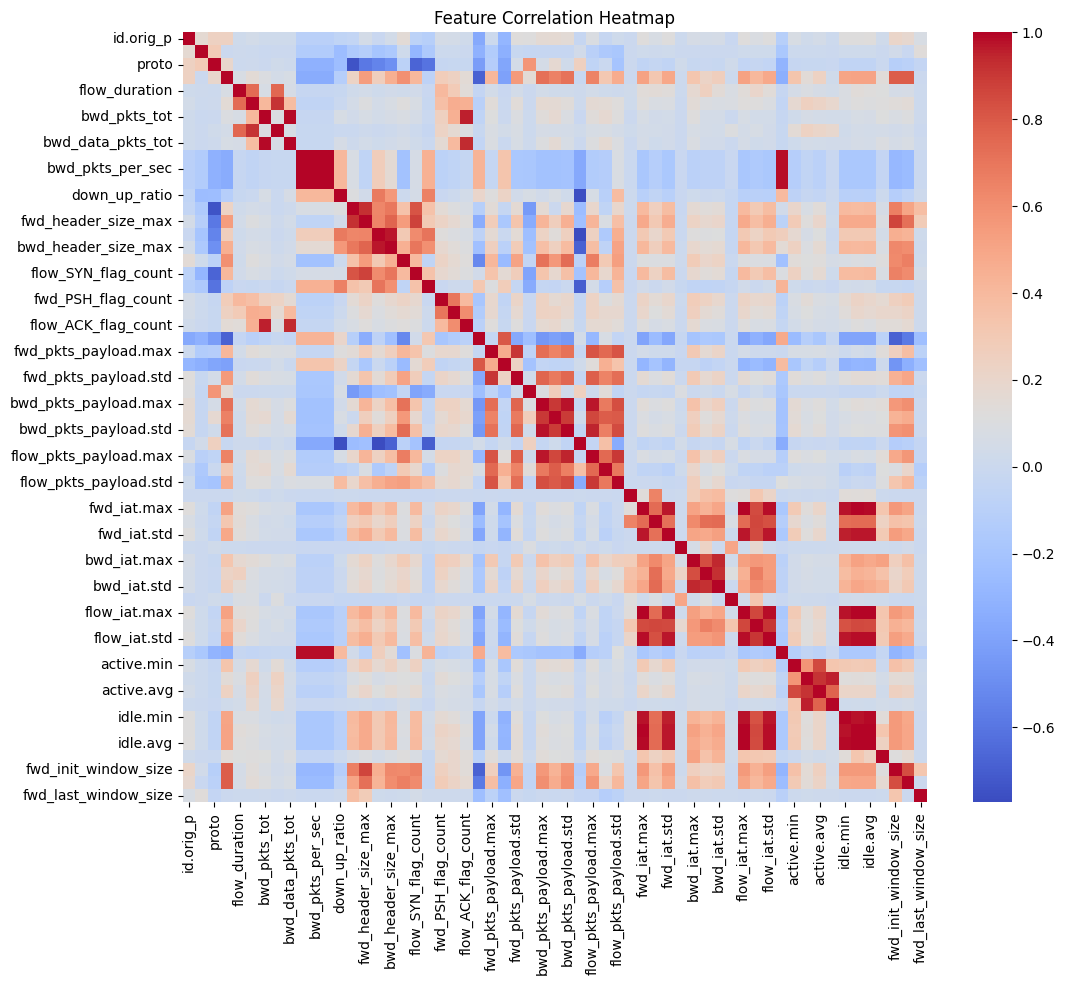

In [11]:
plt.figure(figsize=(12,10))
corr = df_reduced.drop(columns=['Attack_type']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = X_scaled
y = df_reduced['Attack_type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model 1: Logistic Regression
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_lr, average='weighted'))

# Model 2: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Metrics:")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_xgb, average='weighted'))


Logistic Regression Metrics:
Accuracy : 0.9879385964912281
Precision: 0.98803540556684
Recall   : 0.9879385964912281
F1 Score : 0.9878157462137148

XGBoost Metrics:
Accuracy : 0.9982537361923327
Precision: 0.9982619982017771
Recall   : 0.9982537361923327
F1 Score : 0.9982516258633795


In [13]:
from sklearn.model_selection import cross_val_score

lr_cv_scores = cross_val_score(lr, X, y, cv=5)
xgb_cv_scores = cross_val_score(xgb, X, y, cv=5)

print("Logistic Regression CV Accuracy:", lr_cv_scores.mean())
print("XGBoost CV Accuracy:", xgb_cv_scores.mean())


Logistic Regression CV Accuracy: 0.9823016141899374
XGBoost CV Accuracy: 0.9927062813530838


Silhouette Score: 0.7957631781046064


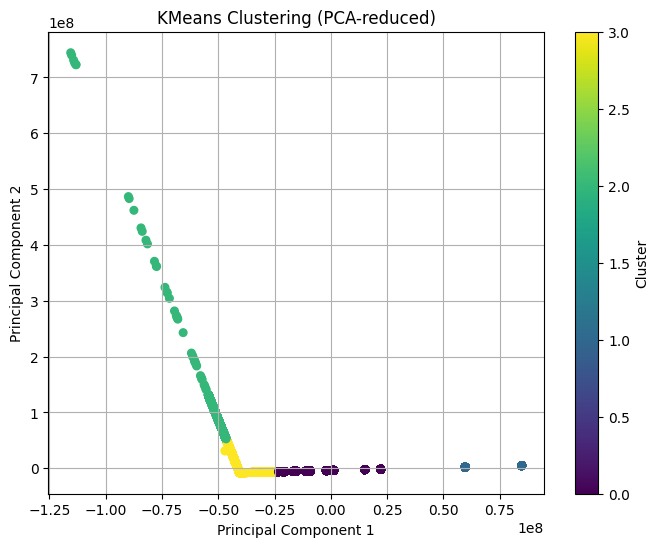

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

X_cluster = df_reduced.drop(columns=['Attack_type'])

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

sil_score = silhouette_score(X_cluster, cluster_labels)
print("Silhouette Score:", sil_score)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("KMeans Clustering (PCA-reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

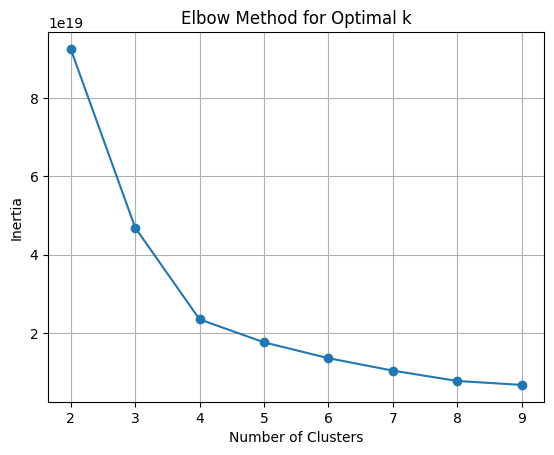

In [15]:
inertia = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [16]:
cluster_df = pd.DataFrame(X_cluster)
cluster_df['Cluster'] = cluster_labels

# Mean values per cluster
cluster_means = cluster_df.groupby('Cluster').mean()
print("Mean Feature Values per Cluster:")
print(cluster_means.round(2))

Mean Feature Values per Cluster:
         id.orig_p  id.resp_p  proto  service  flow_duration  fwd_pkts_tot  \
Cluster                                                                      
0         29854.42      21.00   1.00     0.00           0.00          1.00   
1         33473.91      21.00   1.00     0.00           0.00          1.00   
2         47163.53    1739.18   1.01     5.31          87.95         15.13   
3         41743.13    3224.92   1.35     1.55           4.07          3.89   

         bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
Cluster                                                                         
0                1.00               1.00               0.00         272842.37   
1                1.00               1.00               0.00        1007163.36   
2               12.32               5.54               8.83              0.22   
3                2.95               2.14               1.90          34855.94   

         ..

In [17]:
# Add attack type back for mapping
cluster_df['Attack_type'] = df_reduced['Attack_type'].values

# Cross-tabulation
mapping_table = pd.crosstab(cluster_df['Cluster'], cluster_df['Attack_type'])
print("Cluster-to-Attack-Type Mapping:")
print(mapping_table)

Cluster-to-Attack-Type Mapping:
Attack_type    0    1      2     3   4   5     6     7     8     9     10   11
Cluster                                                                       
0               0    0  56918     0   0   0     0     0     0     0     0    0
1               0    0  26333     0   0   0     0     0     0     0     0    0
2             400    0      0  3216   0   0     0     0     1     0    24   17
3            7350  534  11408   930  37  28  2000  1002  2589  2010  8084  236
